In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
train = pd.read_csv("C:/Users/kamar/OneDrive/Desktop/fa16-master/fa16-master/datasets/MNIST/train.csv")

In [29]:
train_vals = train.drop("label", axis=1)
train_labels = train["label"]

In [30]:
train_vals 

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def get_vector_from_index(df, index):
    return df.iloc[[index]].values

def show_vector(vector):
    plt.matshow(vector.reshape(28, 28))

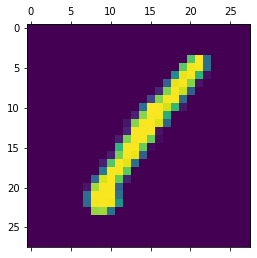

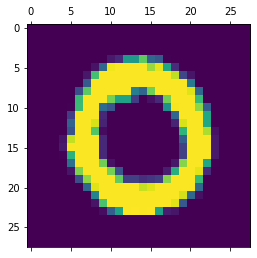

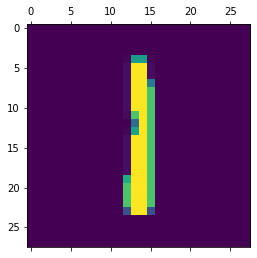

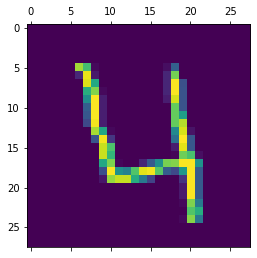

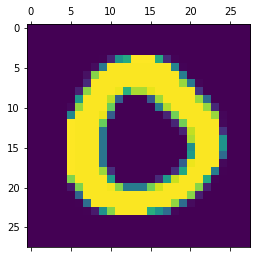

In [32]:
for v in range(5):
    show_vector(get_vector_from_index(train_vals, v))

In [33]:
grouped = train.groupby("label").sum()

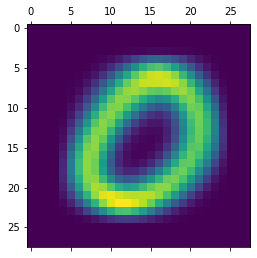

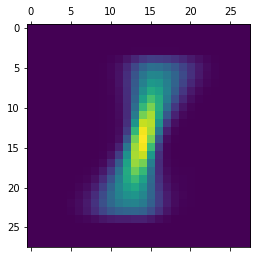

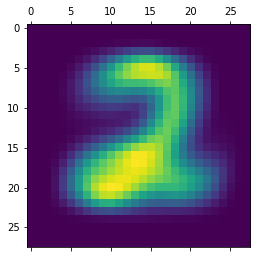

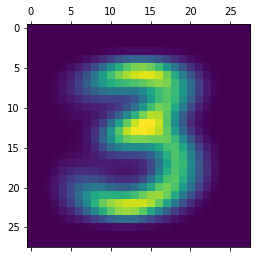

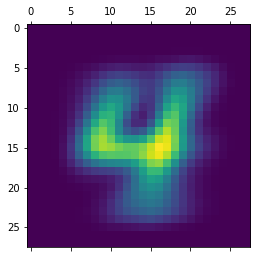

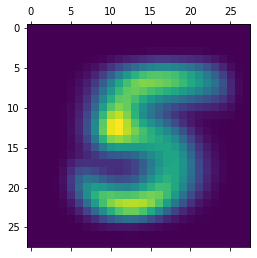

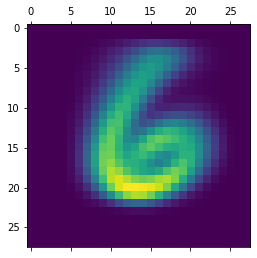

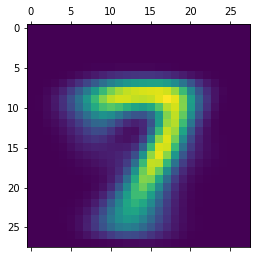

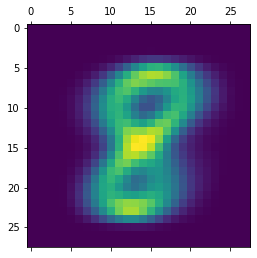

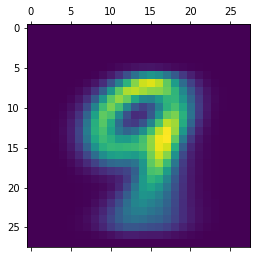

In [34]:
for i in range(10):
    show_vector(get_vector_from_index(grouped, i))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(train,test_size=0.1,random_state=198)
X_train, y_train = train_data.drop("label", axis=1), train_data["label"]
X_valid, y_valid = validation_data.drop("label", axis=1), validation_data["label"]
print(X_train.shape, X_valid.shape)

(37800, 784) (4200, 784)


In [36]:
import time

clf = LogisticRegression()
a = time.clock()
clf.fit(X_train.to_numpy()[:4200], y_train.to_numpy()[:4200])
pred = clf.predict(X_valid)
b = time.clock()
print(b - a)
print(np.mean(pred == y_valid))

1.64894799999999
0.8611904761904762


C:\Users\kamar\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# *k*-nearest neighbors algorithm (kNN)



An object is classified by a majority vote of its neighbors, and is assigned to the class most common among its k nearest neighbors.

http://yann.lecun.com/exdb/mnist/


![texte](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)
![texte](http://image.slidesharecdn.com/machinelearningintroduction-120427064838-phpapp01/95/machine-learning-introduction-14-638.jpg?cb=1389174073)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

train_data, validation_data = train_test_split(train,test_size=0.1,random_state=198)
X_train, y_train = train_data.drop("label", axis=1), train_data["label"]
X_valid, y_valid = validation_data.drop("label", axis=1), validation_data["label"]

In [38]:
clf = KNeighborsClassifier(n_neighbors = 5)
              
a = time.clock()
clf.fit(X_train.to_numpy()[:1000], y_train.to_numpy()[:1000])
pred = clf.predict(X_valid)
pred2 = clf.predict(X_train.to_numpy()[:1000])
b = time.clock()
print("{0:.1f} Seconds to predict based on 1000 training examples".format(b-a))
print("{0:.2f}% validation accuracy".format(np.mean(pred == y_valid) * 100))

0.9 Seconds to predict based on 1000 training examples
87.24% validation accuracy
